# **Analise de Dados Clientes Inadimplentes**

**Objetivo da analise**

Os dados contém informaçoes de clientes de uma intituiçao financeira, nosso foco será para a segunda coluna, chamada de **default**, que indica se o cliente é adimplente(default==0) ou inadimplente (default==1), queremos entender porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos.

**Atributos**

* id: número da conta
* default: Indica se o cliente é adimplente (0) ou inadimplente (1)
* idade: idade do cliente
* sexo: sexo do cliente (M/F)
* dependentes: número de dependentes do cliente
* escolaridade: nível de escolaridade do cliente
* estado_civil: estado civil do cliente
* salario_anual: Faixa do salario mensal multiplicado por 12
* tipo_cartao: Categoria do cartao: blue, silver, gold e platinium
* meses_de_relacionamento: Quantidade de meses desde a abertura da conta
* qtd_produtos: Quantidade de produtos contratados
* iteracoes_12m: Quantidade de iteracoes com o cliente no último ano
* meses_inatico_12m: Quantidade de meses que o cliente

**Bibliotecas**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Exploraçao dos dados**

* Download do arquivo

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

* Vizualizando as 10 primeiras linhas

In [ ]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


# **2. Estrutura**



In [ ]:
df.shape # Quantidade de linhas e colunas

(10127, 16)

In [ ]:
# quantidades de linhas e colunas do atributo default
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
qtd_total,_ = df.shape
qtd_adimplentes,_ = df[df['default'] == 0].shape
qtd_inadimplentes,_ = df[df['default'] == 1].shape

* Vizualizando melhor a proporçao de clientes adimplentes e inadimplentes

In [ ]:
print(f'A proporçao de clientes adimplentes é de {(qtd_adimplentes * 100) / qtd_total:.2f}%')
print(f'A proporçao de clientes inadimplentes é de {(qtd_inadimplentes * 100) / qtd_total:.2f}%')

A proporçao de clientes adimplentes é de 83.93%
A proporçao de clientes inadimplentes é de 16.07%


### **2.2 Schema**

Vamos vizualizar qual coluna e valor dos dados são diferentes do que esperamos.
Assim, podemos voltar aos dados para corrigir esse valor

In [ ]:
df.head(n=2)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33


In [ ]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

* Atributos categóricos

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Através do schema vizualizamos que os atributos **'limite_credito'** e **'valor_transacoes_12m'** não pertence ao atributo categórico e sim ao atributo numérico, vamos tratar isso mais pra frente...

### **2.3 Dados faltantes**

dados faltantes podem ser:
* Vazio (" ")
* Nulos (None)
* Não disponíveis ou aplicaveis  ( na , NA , etc.);
* Não numérico ( nan , NaN , NAN , etc).


* Vizualizando colunas com dados faltantes

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

* A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd / total)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 11}}


In [ ]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 15}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 11}}


In [ ]:
stats_dados_faltantes(df=df[df['default']== 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 16}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 8}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11}}


# **3. Limpeza dos dados**

Para transformaçao desses dados vamos ultilizar uma ferramenta conhecida como data wragling que consiste em transformar e manipular dados em formato 'crus' para outros formatos com a intençao de entregar as informaçoes contidas nos dados em informaçao útil.

### **3.1 Correçao do schema**

Como prometido agora vamos tratar os atributos **'limite_credito'**, **'valor_transacoes_12m'** e colocar em sua atribuiçao correta (float64)

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função lambda para limpar os dados. Mas antes, vamos testar sua aplicação
através do método funcional map :


In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))
print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


* Aplicando a funçao

In [ ]:
df['limite_credito'] = df['limite_credito'].apply(fn)

In [ ]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

* Descrevendo novamente o schema

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

* Atributos categóricos

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


* Atributos númericos

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2 Remoçao de dados faltantes**

Como deixamos o panda ciente do que é um dado faltante, a remoçao das linhas será trivial

In [ ]:
#remoçao das linhas com dados faltantes
df.dropna(inplace=True)

* Vizualizando a estrutura de dados novamente

In [ ]:
df.shape

(7081, 16)

In [ ]:
df[df['default'] == 0].shape

(5968, 16)

In [ ]:
df[df['default'] == 1].shape

(1113, 16)

In [ ]:
qtd_total_novo, _= df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [ ]:
#Mostrando a proporçao comparando o antes e depois das remoçoes das linhas com dados faltantes.
print(f'A proporção de adimpentes era de {(qtd_adimplentes * 100) /qtd_total:.2f}%')
print(f'A nova proporção de adimplentes é de {(qtd_adimplentes_novo * 100) / qtd_total_novo:.2f}%')
print("")
print(f'A proporção de clientes inadimplentes era de {(qtd_inadimplentes * 100) / qtd_total:.2f}%')
print(f'A nova proporção de clientes inadimplentes é de {(qtd_inadimplentes_novo * 100) / qtd_total_novo:.2f}%')

A proporção de adimpentes era de 83.93%
A nova proporção de adimplentes é de 84.28%

A proporção de clientes inadimplentes era de 16.07%
A nova proporção de clientes inadimplentes é de 15.72%


Com isso conseguimos vizualizar que a proporçao se manteve, tanto quanto para os adimplentes e os inadimplentes.


* Vizualizando proporção de outros atributos

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


In [ ]:
print(f'A proporção de clientes que possuem cartão blue é de {(6598 * 100) / qtd_total_novo:.2f}%')
print(f'A Proporção de clientes mulheres é de {(3706 * 100) / qtd_total_novo:.2f}%')
print(f'A proporçao de clientes que ganha menos de $40K é de {(2792 * 100) / qtd_total_novo:.2f}%')

A proporção de clientes que possuem cartão blue é de 93.18%
A Proporção de clientes mulheres é de 52.34%
A proporçao de clientes que ganha menos de $40K é de 39.43%


# **4. Vizualizaçao de dados**

Vamos criar diversas visualizações para correlacionar variáveis
explicativas com a variável resposta para buscar entender qual fator leva um cliente a
inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base
de adimplentes e inadimplentes.

In [ ]:
#selecionando um estilo
sns.set_style("whitegrid")

In [ ]:
#Criando um dataframe so com os adimplenes
df_adimplentes = df[df['default'] == 0]

In [ ]:
#Criando um dataframe so com os inadimplentes
df_inadimplentes = df[df['default'] == 1]

### **4.1 Vizualizaçoes categóricas**

Vamos vizualizar a relaçao entre a variável resposta **default** com os atributo categóricos

In [ ]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


Criando uma funçao para analise dos atributos categóricos

In [ ]:
def analise_graficos_categoricos(coluna: str, titulos: list):
  eixo = 0
  max_y = 0
  max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1
  figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

  for dataframe in [df, df_adimplentes, df_inadimplentes]:

    df_to_plot = dataframe[coluna].value_counts().to_frame()
    df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.sort_values(by=[coluna], inplace=True)
    df_to_plot.sort_values(by=[coluna])

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1
  figura.show()

* Escolaridade

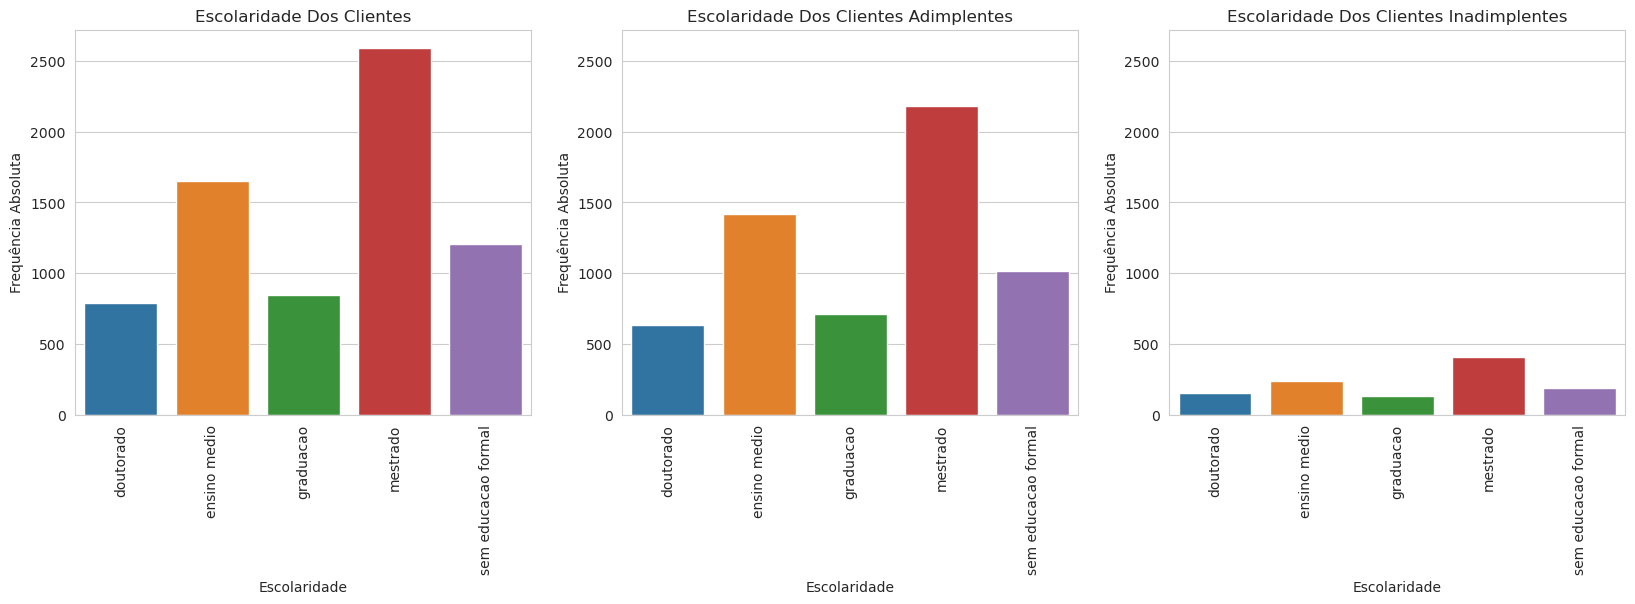

In [ ]:
analise_graficos_categoricos('escolaridade', ['Escolaridade Dos Clientes','Escolaridade Dos Clientes Adimplentes', 'Escolaridade Dos Clientes Inadimplentes'])

Analisando o grafíco percebemos que a distribuiçao se manteve, o mesmo formato que temos para os adimplentes se repete para os inadimplentes. ou seja, olhar para a escolaridade não explica o fato do cliente deixar de honrar com suas dívidas.

* Salário anual

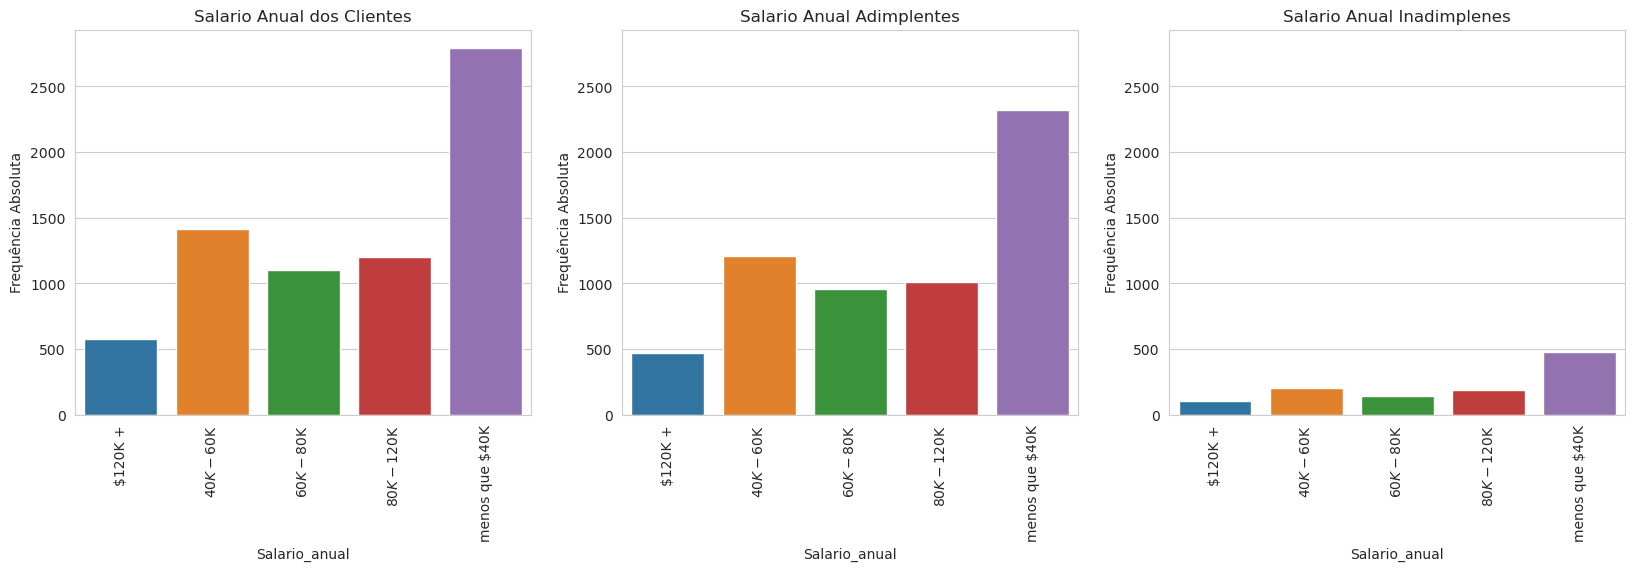

In [ ]:
analise_graficos_categoricos('salario_anual', ['Salario Anual dos Clientes', 'Salario Anual Adimplentes', 'Salario Anual Inadimplenes'])

Com a coluna **Salario_anual** o padrão também se repete, e a conclusão que chega ao analisar essa coluna é que a gente nao consegue obter nenhum tipo de relacionamento entre o **default** e o salario anual dos clientes.

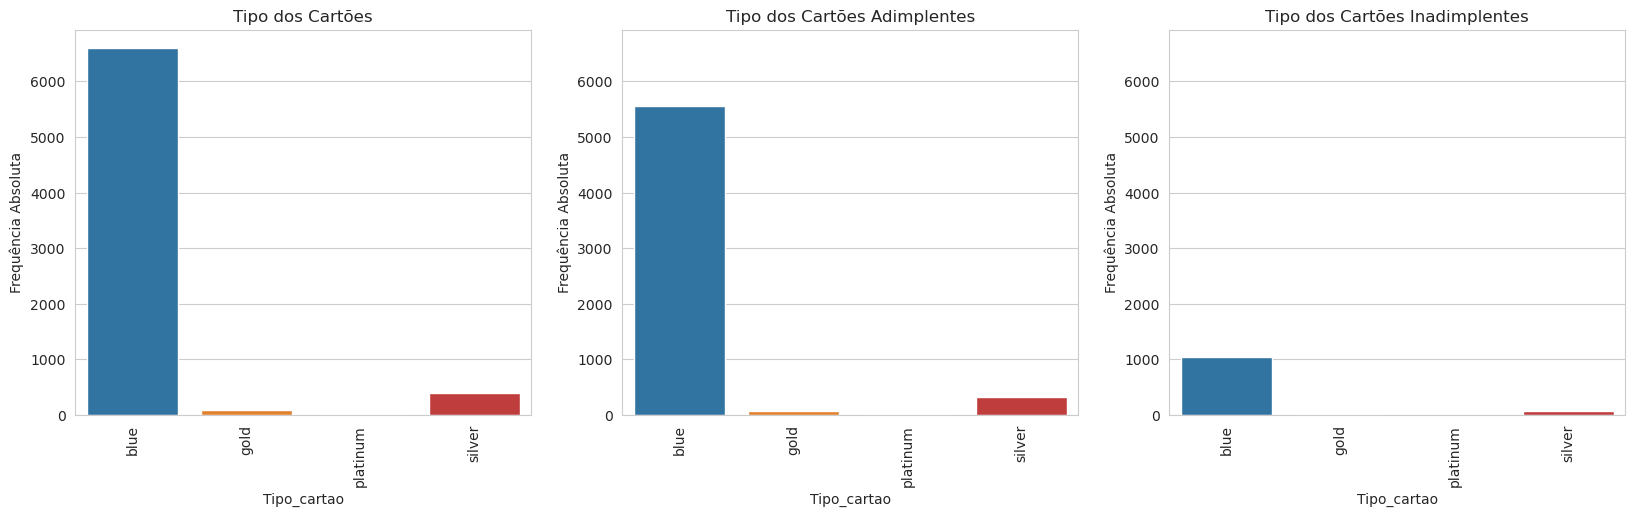

In [ ]:
analise_graficos_categoricos('tipo_cartao', ['Tipo dos Cartões', 'Tipo dos Cartões Adimplentes', 'Tipo dos Cartões Inadimplentes'])

Para esse atributo conseguimos vizualizar que apesar de poucos clientes possuírem o cartão Gold, todos eles são adimplentes.

* Vizualizando se existe alguma relaçao entre o estado civil com o **default**

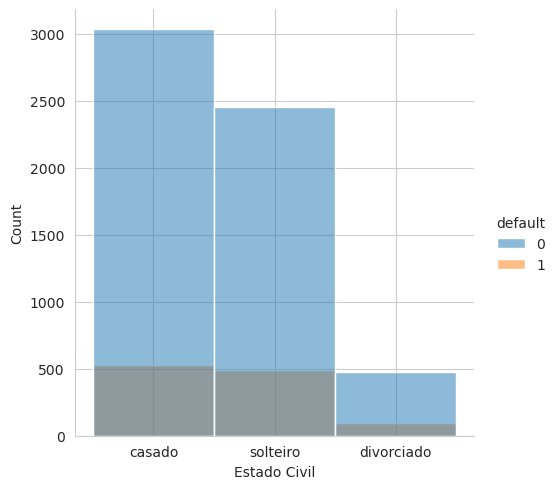

In [ ]:
f = sns.displot(data=df, x = "estado_civil", hue='default')
_  = f.set(
    xlabel='Estado Civil',
  )

Apesar dos clientes com o estado civil == (solteiro) apresentarem uma base menor comparada aos clientes casados, a quantidade de membros solteiros inadimplentes corresponde a um valor próximo aos membros casados.

### **4.2 Vizualizaçoes númericas**

Agora vamos dar uma olhada nas variáveis númericas, vamos ver se ela nos ajuda a entender o comportamento dos clientes inadimplentes.

In [ ]:
#relembrando as opçoes
df.drop(['id', 'default'],axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Criando uma funçao para vizualizar os dados

In [ ]:
def analise_grafico_numericos(coluna: str, titulos: list):
  eixo = 0
  max_y = 0
  figura, eixos = plt.subplots(1,3, figsize=(20,5), sharex=True)

  for dataframe in [df, df_adimplentes, df_inadimplentes]:

    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência absoluta')

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    eixo += 1

  figura.show()

* Quantidade de produtos contratados

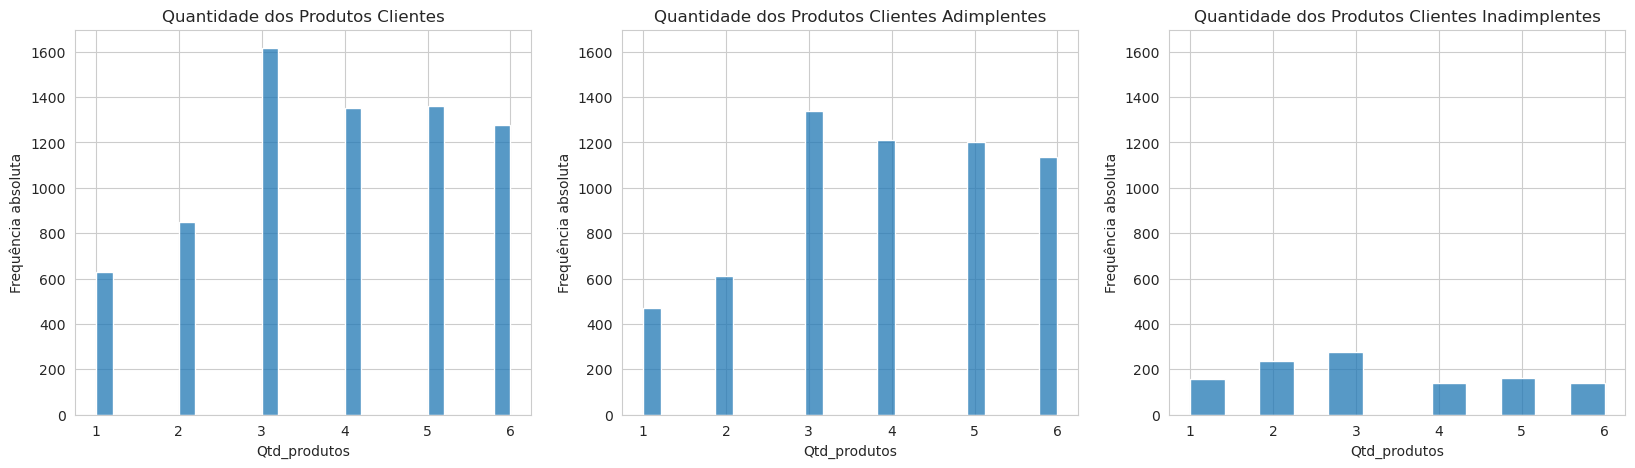

In [ ]:
analise_grafico_numericos('qtd_produtos', ['Quantidade dos Produtos Clientes', 'Quantidade dos Produtos Clientes Adimplentes', 'Quantidade dos Produtos Clientes Inadimplentes'])

Vizualizando o gráfico podemos analisar uma inversão das colunas 4 e 5 entre clientes adimplentes e inadimplentes. Mas não representa uma mudança significativa.

* Meses de relacionamento

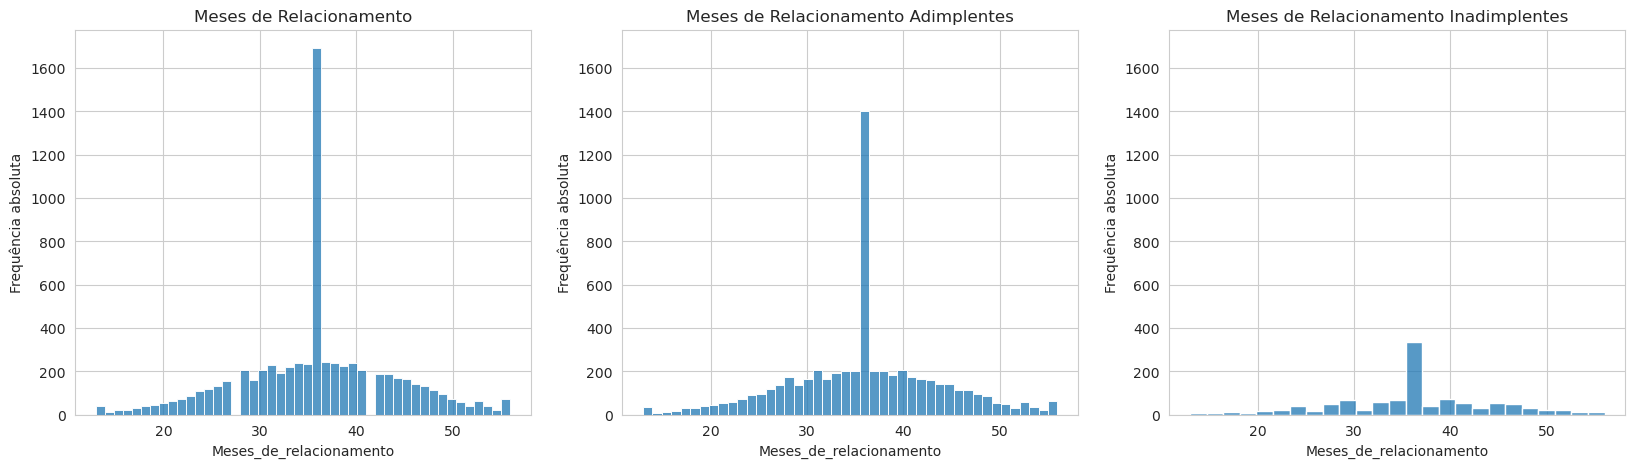

In [ ]:
analise_grafico_numericos('meses_de_relacionamento', ['Meses de Relacionamento', 'Meses de Relacionamento Adimplentes', 'Meses de Relacionamento Inadimplentes'])

* Quantidade de transações nos últimos 12 meses

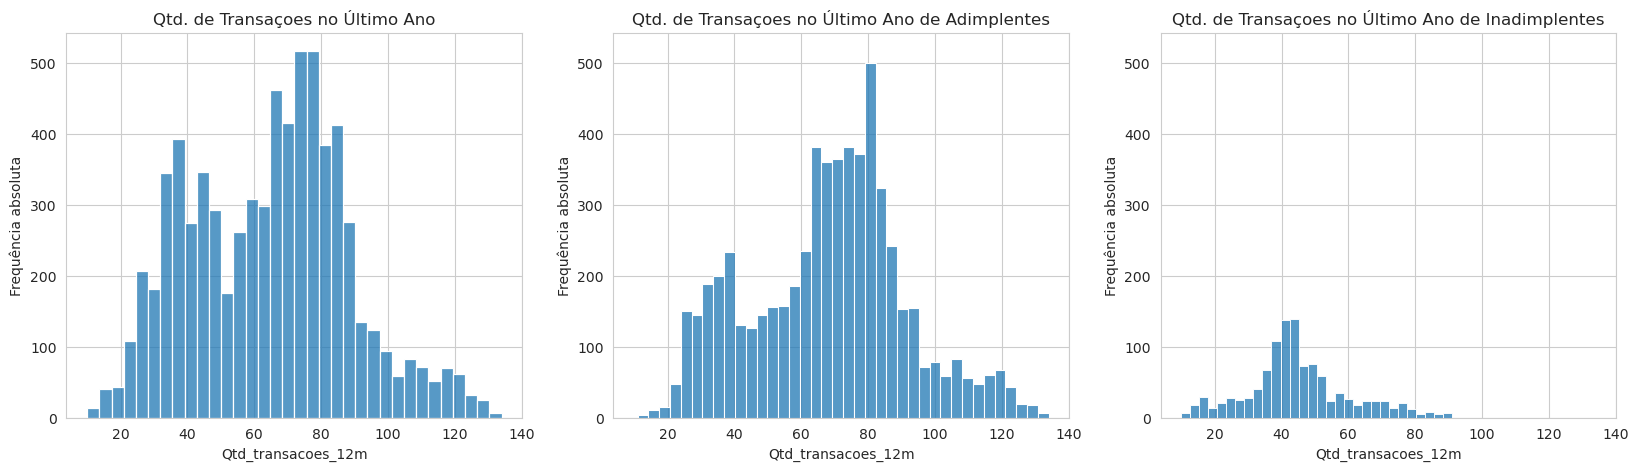

In [ ]:
analise_grafico_numericos('qtd_transacoes_12m', ['Qtd. de Transaçoes no Último Ano', 'Qtd. de Transaçoes no Último Ano de Adimplentes', 'Qtd. de Transaçoes no Último Ano de Inadimplentes'])

Vizualizando os gráficos **Qtd_transacoes_12m** da pra analisar que no terceiro gráfico existe uma concentração de clientes inadimplentes no intervalo de 20 a 60. Concentraçao que falta no segundo gráfico, essa falta podemos considerar uma área em que clientes realizam o **default**

* Valor das transações nos últimos 12 meses

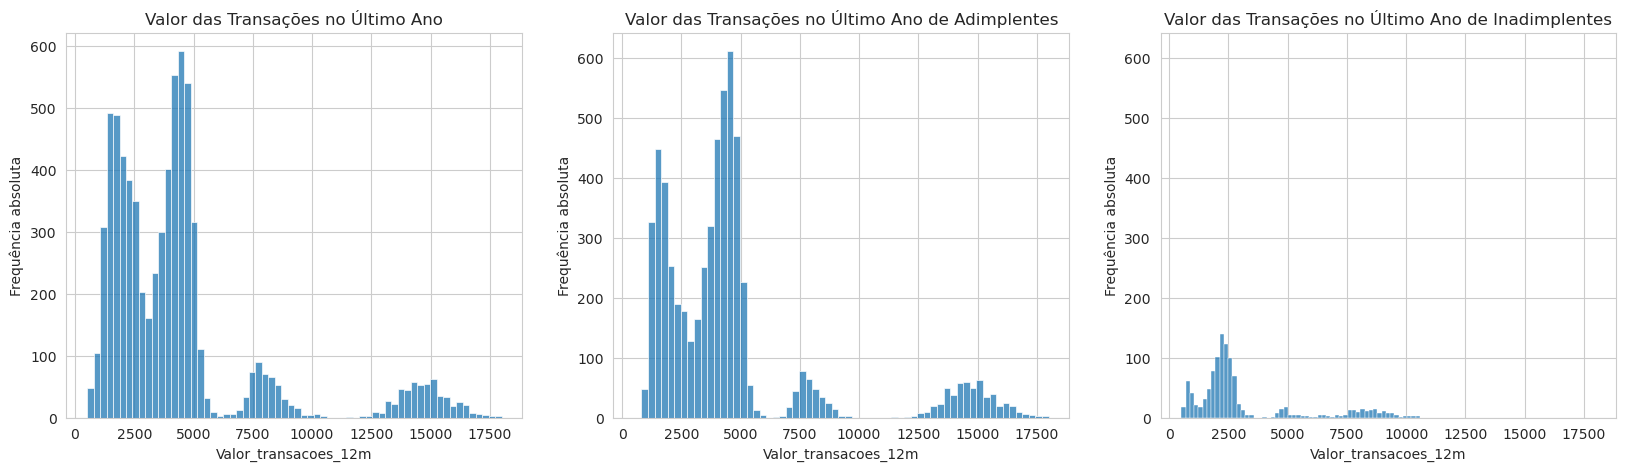

In [ ]:
analise_grafico_numericos('valor_transacoes_12m', ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes'])

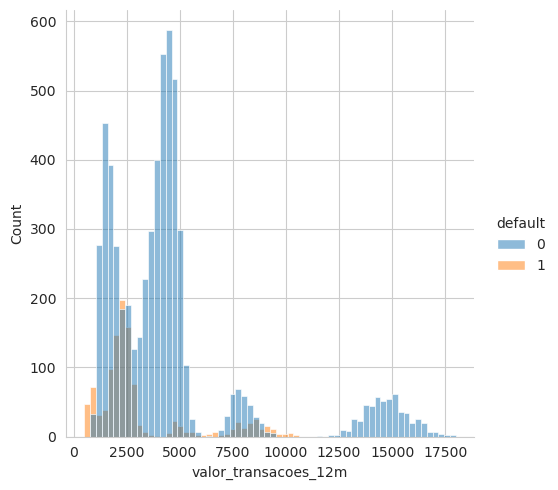

In [ ]:
f = sns.displot(data=df, x = "valor_transacoes_12m", hue= "default")

O valor das transações no último ano nos ajuda a vizualizar perfeitamente a região em que clientes inadimplentes frequentam. Isso demonstra que membros inadimplentes transitam próximos a faixa de R$2500, coisa que ocorre com menos frequência em membros adimplentes.

* Valor das transações nos últimos 12 meses x Quantidade de transações nos últimos 12 meses

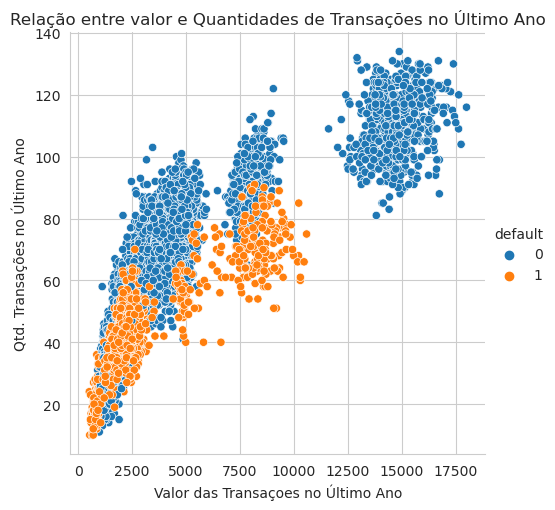

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_  = f.set(
    title='Relação entre valor e Quantidades de Transações no Último Ano',
    xlabel='Valor das Transaçoes no Último Ano',
    ylabel='Qtd. Transações no Último Ano'
  )


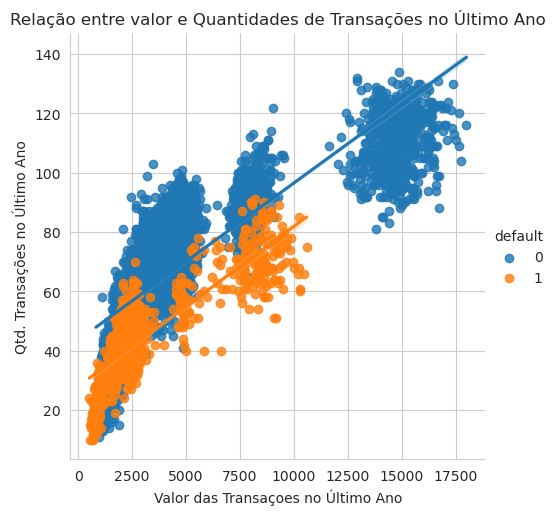

In [ ]:
f = sns.lmplot(data=df, x = "valor_transacoes_12m", y= 'qtd_transacoes_12m', hue='default')
_  = f.set(
    title='Relação entre valor e Quantidades de Transações no Último Ano',
    xlabel='Valor das Transaçoes no Último Ano',
    ylabel='Qtd. Transações no Último Ano'
  )

As bolinhas azuis representam clientes que não cometeram **default** e as laranjas representam clientes que cometeram **default**.
Vizualizando a imagem uma coisa fica bem clara, clientes que transacionam muito e com valores altos se agrupam e esse grupo gerado não apresenta nenhum tipo de exemplo dentro da nossa base.

# **5. Conclusão**

Alguns insights extraidos do conjunto de dados de crédito.

1. 84.28% dos clientes são adimplentes
2. 15.72% dos clientes são inadimplentes
3. 93.18% dos clientes possuem cartão blue
3. 52.34% dos clientes são mulheres
3. O conjunto de dados possuia 3046 linhas com dados faltantes
3. O nível de escolaridade não ajuda a explicar o default
4. Salário anual dos clientes não ajuda a explicar o default
5. Com a quantidade de transações no último ano dos clientes obtivemos resultado, conseguimos vizualizar uma área em que geralmente os clientes cometem o **default**
6. Com os valores das transações no último ano támbem obtivemos sucesso na análise.
  
Com nossas análises obtivemos resultados significantes que nos ajudaram a entender o que leva os clientes a cometerem o **default**, em especial as colunas númericas. Com a relaçao entre valor e quantidades de transações no último ano conseguimos vizualizar um agrupamento de clientes que não tem nenhum exemplo de **default**, isso já nos leva a descartar e focar apenas em nosso objetivo que são os clientes que deixam de honrar com suas dívidas.
